## LDA 3

# Fitting an LDA to our corpus

We plan to perform topic modeling using *Latent Dirichlet Allocation* (abbreviated as LDA). An LDA is a *generative model* that learns a group of categories (or *topics*) for words that occur together in a corpus of documents. For a technical presentation of LDAs, see [Appendix A](404).

Let's start loading up our corpus:

In [1]:
from utils.corpus import Corpus

corpus = Corpus(registry_path = 'utils/article_registry.json')

In [2]:
from utils.model import Model

n_topics = 10
base_model = Model(corpus, n_topics)

Loading corpus. Num. of articles: 68


In [3]:
base_model.prepare()

In [5]:
base_model.get_orphans()

[]

TODO: change for LdaModelMulticore (?).

We can save this model:

In [4]:
base_model.save()

Saved to: gensim_models/gensim_10/yLDA_gensim_10.model


## Analyzing the Model Coherence

In [6]:
base_model.get_coherence()

0.31988007276082053

This coherence score allows us to do a search for the "best" `n_topics`. Let's print the coherence doing a normal search between 10 and 150 topics. Notice that this coherence score is sensitive to the random number generation that is used when creating the `lda`.

In [8]:
coherence_per_topics = {}
for n_topics in range(10, 200, 10):
    coherences = []
    for _ in range(3):
        model = Model(corpus, n_topics)
        model.prepare()
        c = model.get_coherence()
        coherences.append(c)
        print(f'Topics: {n_topics}. Coherence Score: {c}')
    coherence_per_topics[n_topics] = coherences

Loading corpus. Num. of articles: 68
Topics: 10. Coherence Score: 0.30356294955353064
Loading corpus. Num. of articles: 68
Topics: 10. Coherence Score: 0.3991402875404363
Loading corpus. Num. of articles: 68
Topics: 10. Coherence Score: 0.3743846329655319
Loading corpus. Num. of articles: 68


KeyboardInterrupt: 

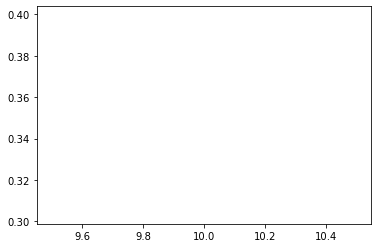

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = list(coherence_per_topics.keys())
y = [coherence_per_topics[n] for n in x]

plt.plot(x, y, "--r")

As we can see, the coherence moves between 0.39 and 0.43. The optimal amount of topics seems to be upwards of 100 topics. However, we will run this same gridsearch, but storing more metadata about each model (such as: amount of documents per topic, and time it takes to train)

## Running a more complete grid-search

TODO: Run it again after addressing this comment: https://github.com/RaRe-Technologies/gensim/issues/2115#issuecomment-443113360

In [12]:
def gridsearch(min_topics, max_topics, step, iterations=3, verbose=True):
    """
    Computes an array like this:
    experiment = {
        n_topics: {
            0: get_metadata(n_topics),
            1: get_metadata(n_topics),
            ...
            iterations - 1: get_metadata(n_topics)
        }
    }
    and we expect all these inner get_metadata to be slightly different
    due to stochasticity in the models.
    
    TODO: document better.
    """
    experiment = {}
    for n_topics in range(min_topics, max_topics, step):
        experiment[n_topics] = {}
        for i in range(iterations):
            if verbose:
                print(f"Iteration: {i}")
            
            model = Model(corpus, n_topics)
            model.prepare()
            metadata = model.get_stats()
            experiment[n_topics][i] = metadata

    return experiment

**Careful:** this gridsearch can take a whole evening.

In [17]:
experiment = gridsearch(80, 150, 10, iterations=3)

Iteration: 0
Training an LDA model with 80.
Time elapsed: 472.41s
Training the coherence model with 80.
Time elapsed: 132.66102647781372
For 80:
	Coherence: 0.40734418775746484
	Log Perplexity: -12.361103083588683
Stats on topics:
	Average number of docs per topic: 12.31
	Standard deviation: 23.57
---
Iteration: 1
Training an LDA model with 80.
Time elapsed: 491.94s
Training the coherence model with 80.
Time elapsed: 134.31068229675293
For 80:
	Coherence: 0.4156170568292136
	Log Perplexity: -12.311435930785082
Stats on topics:
	Average number of docs per topic: 12.69
	Standard deviation: 31.56
---
Iteration: 2
Training an LDA model with 80.
Time elapsed: 480.89s
Training the coherence model with 80.
Time elapsed: 131.47425532341003
For 80:
	Coherence: 0.40441719240449225
	Log Perplexity: -12.279931317269778
Stats on topics:
	Average number of docs per topic: 12.89
	Standard deviation: 30.44
---
Iteration: 0
Training an LDA model with 90.
Time elapsed: 608.53s
Training the coherence mod

No topic for article Luis Villavicencio (2007/09/01). La concepción política de la persona y las visiones constitutivas del bien. 56(135)
No topic for article Carlos García (2007/09/01). Casos Gettier y razonadores normales. 56(135)
Time elapsed: 165.0029718875885
For 110:
	Coherence: 0.450019212818261
	Log Perplexity: -14.079334907717644
Stats on topics:
	Average number of docs per topic: 10.58
	Standard deviation: 32.90
---
Iteration: 2
Training an LDA model with 110.
Time elapsed: 432.70s
Training the coherence model with 110.
No topic for article Matthias Vollet (2007/05/01). Aristóteles y la economía entre los límites de la razón práctica. 56(134)
No topic for article Irina Vaskes (2007/05/01). La axiomática estética: deconstrucción. 56(134)
No topic for article Francisco Miro Quesada (1962/01/01). Fundamentación metafísica y fundamentación lógico-axiológica de la praxis política. 4(13)
No topic for article Nicolás Vaughan (2007/05/01). ¿Por qué Leibniz requiere del tiempo absolut

No topic for article Luis Villavicencio (2007/09/01). La concepción política de la persona y las visiones constitutivas del bien. 56(135)
No topic for article Carlos García (2007/09/01). Casos Gettier y razonadores normales. 56(135)
Time elapsed: 179.02109122276306
For 130:
	Coherence: 0.4193055145249577
	Log Perplexity: -15.481910002831965
Stats on topics:
	Average number of docs per topic: 8.87
	Standard deviation: 17.77
---
Iteration: 2
Training an LDA model with 130.
Time elapsed: 457.00s
Training the coherence model with 130.
No topic for article Matthias Vollet (2007/05/01). Aristóteles y la economía entre los límites de la razón práctica. 56(134)
No topic for article Irina Vaskes (2007/05/01). La axiomática estética: deconstrucción. 56(134)
No topic for article Francisco Miro Quesada (1962/01/01). Fundamentación metafísica y fundamentación lógico-axiológica de la praxis política. 4(13)
No topic for article Nicolás Vaughan (2007/05/01). ¿Por qué Leibniz requiere del tiempo absolu

Finally, we can save it for further analysis later on:

In [18]:
import json

In [19]:
with open("../data/gridsearch.json", "w") as fp:
    json.dump(experiment, fp)

## Understanding the gridsearch results 

In [ ]:
with open("../data/gridsearch.json") as fp:
    gridsearch = json.load(fp)

In [ ]:
gridsearch

In [ ]:
def plotting(gridsearch):
    n_topics = np.array(list(gridsearch.keys())).astype(int)
    print(n_topics)
    coherences = []
    log_perplexities = []
    times_lda = []
    times_coherence = []
    
    for n in n_topics:
        iterations = gridsearch[str(n)]
        coherences.append(
            [v["coherence"] for v in iterations.values()]
        )
        log_perplexities.append(
            [v["log_perplexity"] for v in iterations.values()]
        )
        times_lda.append(
            [v["time_lda"] for v in iterations.values()]
        )
        times_coherence.append(
            [v["time_coherence"] for v in iterations.values()]
        )
        
    print(np.mean(coherences, axis=1))
    
    _, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes[0, 0].plot(n_topics, np.mean(coherences, axis=1))
    axes[0, 0].set_title("Coherence metric")
    
    axes[0, 1].plot(n_topics, np.mean(log_perplexities, axis=1))
    axes[0, 1].set_title("Log perplexity")

    axes[1, 0].plot(n_topics, np.mean(times_lda, axis=1))
    axes[1, 0].set_title("LDA training time")
    
    axes[1, 1].plot(n_topics, np.mean(times_coherence, axis=1))
    axes[1, 1].set_title("Coherence training time")

In [ ]:
plotting(gridsearch)

# Optimal topics seems to be 90

Let's reload the gridsearch and study what happens around 90 topics

In [ ]:
with open("../data/gridsearch.json") as fp:
    g = json.load(fp)

In [ ]:
g["90"]

In [ ]:
for k in g:
    for v in g[k].values():
        if "-1" in v["n_articles_per_topic"]:
            print(f"Number of topics: {k}")
            print("Number of articles without 1st topic:")
            print(v["n_articles_per_topic"]["-1"])

From 100 onwards, 254 articles get systematically thrown to 0 topics. Weird!

90 doesn't have the no-topics-for-article problem, should we stick with it?

## Sticking with 90

After reading online, people recommend that we save our dictionary in order to prevent randomness in it in the future. I will also set up the seed for the LDA.

It has been 47,984 days since Wittgetstein was born (as of today, 09/09/20).

In [ ]:
final_model = Model(corpus, 90, seed = 47984)
final_model.prepare()
final_model.save()

In [ ]:
print(final_model.get_stats())